In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import os
os.environ["OMP_NUM_THREADS"] = "1"


In [5]:
data = pd.read_csv('Country-data.csv')
df = pd.DataFrame(data)
# print(df.head())
countries = df['country']
df.drop(['country'], axis=1,inplace=True)
df_scaled = MinMaxScaler().fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
print(df_scaled.head())
# print(df_scaled.describe())
# print(df_scaled.info())

   child_mort   exports    health   imports    income  inflation  life_expec  \
0    0.426485  0.049482  0.358608  0.257765  0.008047   0.126144    0.475345   
1    0.068160  0.139531  0.294593  0.279037  0.074933   0.080399    0.871795   
2    0.120253  0.191559  0.146675  0.180149  0.098809   0.187691    0.875740   
3    0.566699  0.311125  0.064636  0.246266  0.042535   0.245911    0.552268   
4    0.037488  0.227079  0.262275  0.338255  0.148652   0.052213    0.881657   

   total_fer      gdpp  
0   0.736593  0.003073  
1   0.078864  0.036833  
2   0.274448  0.040365  
3   0.790221  0.031488  
4   0.154574  0.114242  


<Axes: >

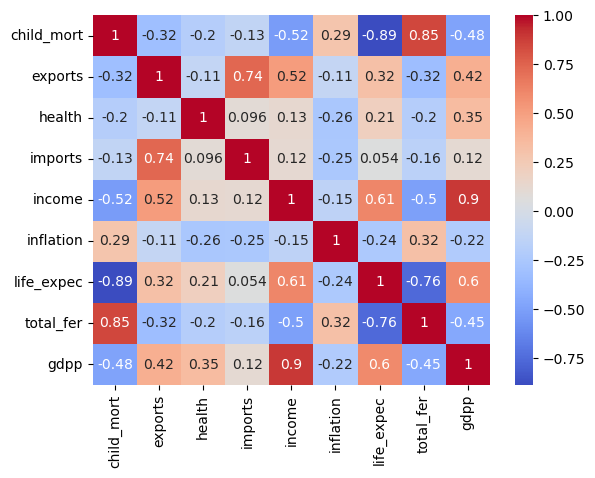

In [25]:
corr_mat = df_scaled.corr()
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')

c:\Users\asmit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\asmit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\asmit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\asmit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

Text(0, 0.5, 'WCSS')

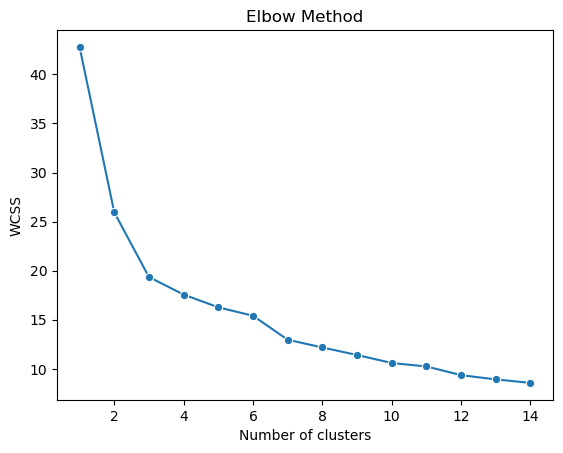

In [28]:
wcss=[]
for k in range(1,15):
    kmeans = KMeans(n_clusters=k, init='k-means++',random_state=42) 
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

sns.lineplot(x=range(1,15),y=wcss,marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

taking 4 as the no of clusters

In [41]:
kmeans = KMeans(n_clusters=3, init='k-means++',random_state=42) 
kmeans.fit(df_scaled)
cluster_labels = kmeans.predict(df_scaled)
# df['Cluster'] = cluster_labels
print("Cluster Labels:")
print(cluster_labels)

Cluster Labels:
[2 0 0 2 0 0 0 1 1 0 0 0 0 0 0 1 0 2 0 0 0 0 0 1 0 2 2 0 2 1 0 2 2 0 0 0 2
 2 2 0 2 0 1 1 1 0 0 0 0 2 2 0 0 1 1 2 2 0 1 2 1 0 0 2 2 0 2 0 1 0 0 0 2 1
 1 1 0 1 0 0 2 2 1 0 2 0 0 2 2 0 0 1 0 2 2 0 0 2 1 2 0 0 0 0 0 0 2 0 2 0 1
 1 2 2 1 0 2 0 0 0 0 0 1 1 0 0 2 0 0 2 0 0 2 1 1 1 0 0 1 1 0 0 2 0 1 1 0 2
 0 2 2 0 0 0 0 2 0 1 1 1 0 0 0 0 0 2 2]


c:\Users\asmit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Imports')

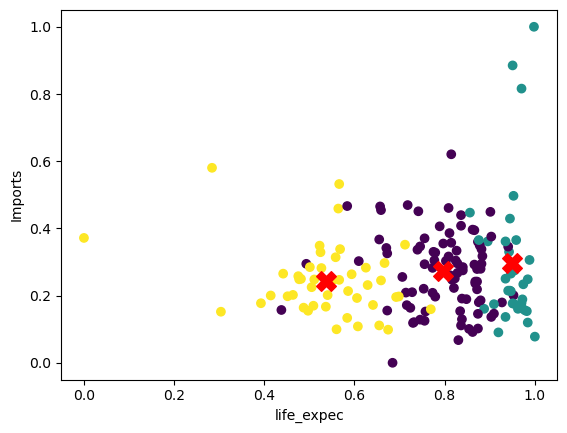

In [42]:
plt.scatter(df_scaled['life_expec'],df_scaled['imports'],c=cluster_labels)
plt.scatter(kmeans.cluster_centers_[:, 6], kmeans.cluster_centers_[:, 3], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('life_expec')
plt.ylabel('Imports')

Text(0, 0.5, 'exports')

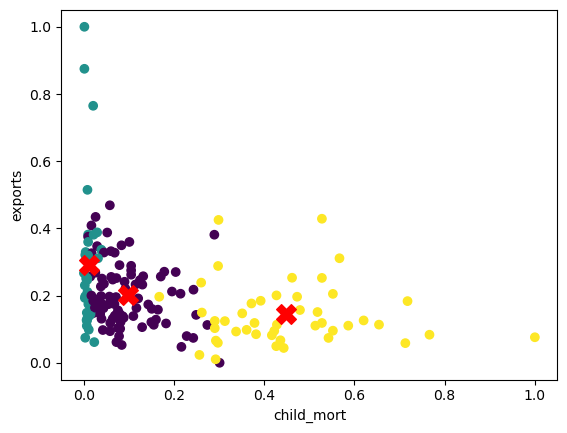

In [43]:
plt.scatter(df_scaled['child_mort'],df_scaled['exports'],c=cluster_labels)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('child_mort')
plt.ylabel('exports')